In [44]:
import colorsys
import random

def get_n_hls_colors(num):
    hls_colors = []
    i = 0
    j = 0
    step = 360.0 / num
    while j < num:
        h = i
        s = 90 #+ random.random() * 10
        l = 50 #+ random.random() * 10
        _hlsc = [h / 360.0, l / 100.0, s / 100.0]
        hls_colors.append(_hlsc)
        i += step
        j += 1
    return hls_colors

def ncolors(num):
    rgb_colors = []
    if num < 1:
        return rgb_colors
    hls_colors = get_n_hls_colors(num)
    for hlsc in hls_colors:
        _r, _g, _b = colorsys.hls_to_rgb(hlsc[0], hlsc[1], hlsc[2])
        r, g, b = [int(x * 255.0) for x in (_r, _g, _b)]
        rgb_colors.append([r, g, b])
    return rgb_colors, hls_colors

colors, hls = ncolors(19)

In [58]:
import pickle as pk

thisdir = '/home/lscsc/caizhijie/0420-wamera-benchmark/data/openpose/pic/env0_subj0_group0_angle1_cam2_t1/2023_06_11_19_04_39_211.pk'

openpose = pk.load(open(thisdir, 'rb'))
maskrcnn = pk.load(open(thisdir.replace('openpose', 'maskrcnn'), 'rb'))

In [59]:
maskrcnn

{'pred_boxes': Boxes(tensor([], size=(0, 4))),
 'scores': tensor([]),
 'pred_classes': tensor([], dtype=torch.int64),
 'pred_masks': array([], shape=(0, 1, 54, 96), dtype=uint8)}

In [60]:
openpose

{'aff': array([[[9.704e-05, 9.704e-05, 9.704e-05, ..., 8.786e-05, 1.571e-04,
          1.571e-04],
         [9.704e-05, 9.704e-05, 9.704e-05, ..., 8.786e-05, 1.571e-04,
          1.571e-04],
         [9.704e-05, 9.704e-05, 9.704e-05, ..., 8.786e-05, 1.571e-04,
          1.571e-04],
         ...,
         [3.834e-04, 3.834e-04, 3.834e-04, ..., 5.376e-05, 1.013e-04,
          1.013e-04],
         [1.869e-04, 1.869e-04, 1.869e-04, ..., 6.717e-05, 6.800e-04,
          6.800e-04],
         [1.869e-04, 1.869e-04, 1.869e-04, ..., 6.717e-05, 6.800e-04,
          6.800e-04]],
 
        [[1.508e-05, 1.508e-05, 1.508e-05, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [1.508e-05, 1.508e-05, 1.508e-05, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [1.508e-05, 1.508e-05, 1.508e-05, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         ...,
         [2.545e-05, 2.545e-05, 2.545e-05, ..., 0.000e+00, 0.000e+00,
          0.000e+00],
         [3.475e-05, 3.475e-05, 3.475e-05,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


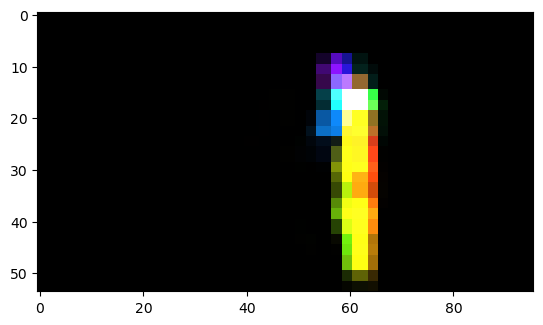

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.abs(np.matmul((openpose['kpt'][0::2, ...].transpose(1, 2, 0) ** 2 + openpose['kpt'][1::2, ...].transpose(1, 2, 0) ** 2) ** 0.5, np.array(colors)[:19, :]) / 255))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


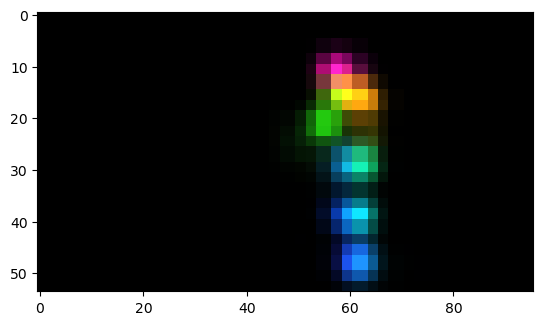

In [62]:
colors[18] = [0, 0, 0]
plt.imshow(np.abs(np.matmul(openpose['aff'][0::1, ...].transpose(1, 2, 0), np.array(colors)[:19, :]) / 255))

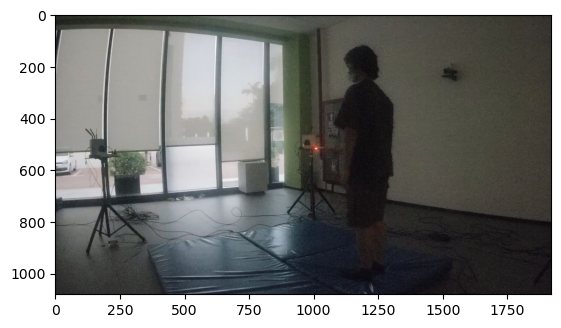

In [63]:
'/home/lscsc/caizhijie/0420-wamera-benchmark/data/openpose/pic/env0_subj0_group0_angle1_cam3_t0/2023_06_11_19_04_29_948.pk'


picdir = thisdir.replace('openpose/', '').replace('pk', 'jpg')
import cv2

plt.imshow(cv2.imread(picdir)[..., ::-1])